### **Predict students' dropout and academic success**






# 1.   Importing libraries



In [ ]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score



# 2.   Data Preprocessing



In [ ]:
df = pd.read_csv('predict_students_dropout_and_academic_success_data.csv', sep=';')
df

,Marital status,Application mode,Application order,Course,Daytime/evening attendance\t,Previous qualification,Previous qualification (grade),Nacionality,Mother's qualification,Father's qualification,...,Curricular units 2nd sem (credited),Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Curricular units 2nd sem (without evaluations),Unemployment rate,Inflation rate,GDP,Target
0,1,17,5,171,1,1,122.0,1,19,12,...,0,0,0,0,0.000000,0,10.8,1.4,1.74,Dropout
1,1,15,1,9254,1,1,160.0,1,1,3,...,0,6,6,6,13.666667,0,13.9,-0.3,0.79,Graduate
2,1,1,5,9070,1,1,122.0,1,37,37,...,0,6,0,0,0.000000,0,10.8,1.4,1.74,Dropout
3,1,17,2,9773,1,1,122.0,1,38,37,...,0,6,10,5,12.400000,0,9.4,-0.8,-3.12,Graduate
4,2,39,1,8014,0,1,100.0,1,37,38,...,0,6,6,6,13.000000,0,13.9,-0.3,0.79,Graduate
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4419,1,1,6,9773,1,1,125.0,1,1,1,...,0,6,8,5,12.666667,0,15.5,2.8,-4.06,Graduate
4420,1,1,2,9773,1,1,120.0,105,1,1,...,0,6,6,2,11.000000,0,11.1,0.6,2.02,Dropout
4421,1,1,1,9500,1,1,154.0,1,37,37,...,0,8,9,1,13.500000,0,13.9,-0.3,0.79,Dropout
4422,1,1,1,9147,1,1,180.0,1,37,37,...,0,5,6,5,12.000000,0,9.4,-0.8,-3.12,Graduate


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4424 entries, 0 to 4423
Data columns (total 37 columns):
 #   Column                                          Non-Null Count  Dtype  
---  ------                                          --------------  -----  
 0   Marital status                                  4424 non-null   int64  
 1   Application mode                                4424 non-null   int64  
 2   Application order                               4424 non-null   int64  
 3   Course                                          4424 non-null   int64  
 4   Daytime/evening attendance	                     4424 non-null   int64  
 5   Previous qualification                          4424 non-null   int64  
 6   Previous qualification (grade)                  4424 non-null   float64
 7   Nacionality                                     4424 non-null   int64  
 8   Mother's qualification                          4424 non-null   int64  
 9   Father's qualification                   

Map categorical Target values to numerical values

In [ ]:
df['Target'] = df['Target'].map({
    'Dropout': 0,
    'Enrolled': 1,
    'Graduate': 2
})
print(df["Target"].unique())

[0 2 1]


Scale values

In [ ]:
column_to_scale = ['Course', 'Previous qualification (grade)', 'Admission grade']
X = df[column_to_scale]

scaler = StandardScaler()

# Fit and transform the data
scaled_X = scaler.fit_transform(X)

#Update DataFrame with scaled values
df[column_to_scale] = scaled_X
df

,Marital status,Application mode,Application order,Course,Daytime/evening attendance\t,Previous qualification,Previous qualification (grade),Nacionality,Mother's qualification,Father's qualification,...,Curricular units 2nd sem (credited),Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Curricular units 2nd sem (without evaluations),Unemployment rate,Inflation rate,GDP,Target
0,1,17,5,-4.209520,1,1,-0.804841,1,19,12,...,0,0,0,0,0.000000,0,10.8,1.4,1.74,0
1,1,15,1,0.192580,1,1,2.076819,1,1,3,...,0,6,6,6,13.666667,0,13.9,-0.3,0.79,2
2,1,1,5,0.103404,1,1,-0.804841,1,37,37,...,0,6,0,0,0.000000,0,10.8,1.4,1.74,0
3,1,17,2,0.444115,1,1,-0.804841,1,38,37,...,0,6,10,5,12.400000,0,9.4,-0.8,-3.12,2
4,2,39,1,-0.408389,0,1,-2.473171,1,37,38,...,0,6,6,6,13.000000,0,13.9,-0.3,0.79,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4419,1,1,6,0.444115,1,1,-0.577342,1,1,1,...,0,6,8,5,12.666667,0,15.5,2.8,-4.06,2
4420,1,1,2,0.444115,1,1,-0.956508,105,1,1,...,0,6,6,2,11.000000,0,11.1,0.6,2.02,0
4421,1,1,1,0.311805,1,1,1.621820,1,37,37,...,0,8,9,1,13.500000,0,13.9,-0.3,0.79,0
4422,1,1,1,0.140722,1,1,3.593483,1,37,37,...,0,5,6,5,12.000000,0,9.4,-0.8,-3.12,2


Check Correlation of Target column

In [ ]:
df.corr()['Target']

Marital status                                   -0.089804
Application mode                                 -0.221747
Application order                                 0.089791
Course                                            0.034219
Daytime/evening attendance\t                      0.075107
Previous qualification                           -0.056039
Previous qualification (grade)                    0.103764
Nacionality                                      -0.014801
Mother's qualification                           -0.043178
Father's qualification                           -0.001393
Mother's occupation                              -0.005629
Father's occupation                              -0.001899
Admission grade                                   0.120889
Displaced                                         0.113986
Educational special needs                        -0.007353
Debtor                                           -0.240999
Tuition fees up to date                           0.4098

Remove other unwanted or irrelevant features from the data

In [ ]:
new_df = df.copy()
new_df = new_df.drop(columns=['Nacionality',
                              'Mother\'s qualification',
                              'Father\'s qualification',
                              'Mother\'s occupation',
                              'Father\'s occupation',
                              'Educational special needs',
                              'International',
                              'Curricular units 1st sem (without evaluations)',
                              'Unemployment rate',
                              'Inflation rate'], axis=1)
new_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4424 entries, 0 to 4423
Data columns (total 27 columns):
 #   Column                                          Non-Null Count  Dtype  
---  ------                                          --------------  -----  
 0   Marital status                                  4424 non-null   int64  
 1   Application mode                                4424 non-null   int64  
 2   Application order                               4424 non-null   int64  
 3   Course                                          4424 non-null   float64
 4   Daytime/evening attendance	                     4424 non-null   int64  
 5   Previous qualification                          4424 non-null   int64  
 6   Previous qualification (grade)                  4424 non-null   float64
 7   Admission grade                                 4424 non-null   float64
 8   Displaced                                       4424 non-null   int64  
 9   Debtor                                   

In [ ]:
new_df['Target'].value_counts()
new_df

,Marital status,Application mode,Application order,Course,Daytime/evening attendance\t,Previous qualification,Previous qualification (grade),Admission grade,Displaced,Debtor,...,Curricular units 1st sem (approved),Curricular units 1st sem (grade),Curricular units 2nd sem (credited),Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Curricular units 2nd sem (without evaluations),GDP,Target
0,1,17,5,-4.209520,1,1,-0.804841,0.022229,1,0,...,0,0.000000,0,0,0,0,0.000000,0,1.74,0
1,1,15,1,0.192580,1,1,2.076819,1.071926,1,0,...,6,14.000000,0,6,6,6,13.666667,0,0.79,2
2,1,1,5,0.103404,1,1,-0.804841,-0.150419,1,0,...,0,0.000000,0,6,0,0,0.000000,0,1.74,0
3,1,17,2,0.444115,1,1,-0.804841,-0.509526,1,0,...,6,13.428571,0,6,10,5,12.400000,0,-3.12,2
4,2,39,1,-0.408389,0,1,-2.473171,1.002867,0,0,...,5,12.333333,0,6,6,6,13.000000,0,0.79,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4419,1,1,6,0.444115,1,1,-0.577342,-0.329972,0,0,...,5,13.600000,0,6,8,5,12.666667,0,-4.06,2
4420,1,1,2,0.444115,1,1,-0.956508,-0.550961,1,1,...,6,12.000000,0,6,6,2,11.000000,0,2.02,0
4421,1,1,1,0.311805,1,1,1.621820,1.555339,1,0,...,7,14.912500,0,8,9,1,13.500000,0,0.79,0
4422,1,1,1,0.140722,1,1,3.593483,1.852293,1,0,...,5,13.800000,0,5,6,5,12.000000,0,-3.12,2


In [ ]:
X = new_df.drop('Target', axis=1)
y = new_df['Target']


# 3.   Train Test and split





Extract independent and dependent variables

In [ ]:
#Seperating Target varible
X = df.iloc[:, :-1].values
y = df['Target'].values

Linear Regression

In [ ]:
#splitting data into train and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

#create linear regression model
model = LinearRegression()

# Train the model on the training set
model.fit(X_train, y_train)

LinearRegression()

# 4. Evaluation model

In [ ]:
#Predict the target values on the test set
y_pred = model.predict(X_test)

# Evaluate the model's performance
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'Mean Squared Error(Accuracy): {mse}')
print(f'R-squared: {r2}')

Mean Squared Error(Accuracy): 0.31124989558162747
R-squared: 0.6080942529396782


# 5.Visualizing results

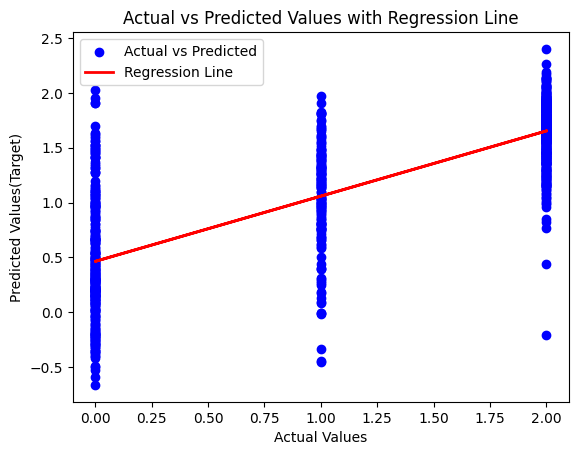

In [ ]:
# Scatter plot of actual vs predicted values
plt.scatter(y_test, y_pred, color='blue', label='Actual vs Predicted')

# Fit a regression line
fit = np.polyfit(y_test, y_pred, deg=1)
line = np.polyval(fit, y_test)

# Plot the regression line
plt.plot(y_test, line, color='red', linewidth=2, label='Regression Line')

# Labels and legend
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values(Target)')
plt.title('Actual vs Predicted Values with Regression Line')
plt.legend()


# Display the plot
plt.show()
